In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data files
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample_submission_kaggle.csv')
extra_infos = pd.read_json('extra_infos.json',lines=True)

# Function that needs to be incorporated to preprocessing

In [ ]:
#This function erases the rows with duration < 30 seconds. See the explanation below.
def temporal_preprocessing(train):
    return train[train['media_duration'] < 30]

# Explanation: why do we need that?

In [14]:
#Vérifier que aucune chanson n'est plus courte que 30 secondes

durations_train = train['media_duration'].tolist()
print("Min duration for train set (in sec):",min(durations_train))
print("Max:",max(durations_train))
print("Mean:",np.mean(durations_train))
print("Median",np.median(durations_train))

print()
durations_test = test['media_duration'].tolist()
print("Min duration for test set (in sec):",min(durations_test))
print("Max:",max(durations_test))
print("Mean:",np.mean(durations_test))
print("Median:",np.median(durations_test))

Min duration for train set (in sec): 0
Max: 65535
Mean: 231.152728847
Median 222.0

Min duration for test set (in sec): 25
Max: 4126
Mean: 232.980720956
Median: 223.0


In [16]:
print("Number of songs for which media_duration < 30 in the train set:",len([el for el in durations_train if el <= 30]))
print()
print("Now in the test set:",len([el for el in durations_test if el <= 30]))

Number of songs for which media_duration < 30 in the train set: 5957

Now in the test set: 1


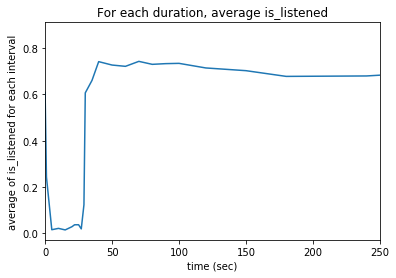

Now we zoom on [0,50], and we add vertical line x = 29, and horizontal line y = 0


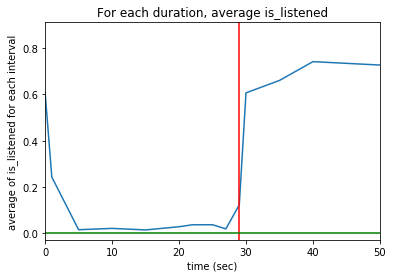

In [20]:
#We look now whether those songs have always is_listened = 0 in the train set. It is actually not the case...

list_time = [0,1,5,10,15,20,22,25,27,29,30,35,40,50,60,70,80,90,100,120,150,180,240,300,500,1000,2000,3000,4000,5000,100000]
#We look at the songs that have a duration between 2 consecutive elements of list_time


list_avg_is_listened = np.zeros(len(list_time)-1)
for i in range(len(list_time)-1):
#     print("between",list_time[i],"and",list_time[i+1])
    train_concerned_songs = \
        train.loc[(train['media_duration'] >= list_time[i]) & (train['media_duration'] < list_time[i+1])]
    list_avg_is_listened[i] = train_concerned_songs['is_listened'].mean()
    
    
plt.plot(list_time[:-1],list_avg_is_listened)
plt.xlim(0,250)
plt.title('For each duration, average is_listened')
plt.xlabel("time (sec)")
plt.ylabel('average of is_listened for each interval')
plt.show()

print("Now we zoom on [0,50], and we add vertical line x = 29, and horizontal line y = 0")
plt.plot(list_time[:-1],list_avg_is_listened)
plt.xlim(0,50)
plt.title('For each duration, average is_listened')
plt.xlabel("time (sec)")
plt.ylabel('average of is_listened for each interval')
plt.axvline(29,color='red')
plt.axhline(0,color='green')
plt.show()

We conclude from that, that there is clearly a difference of distributions between less than 30 seconds of listening, and more (or equal) than 30 seconds of song's duration. It seems strange that is_listened is not exactly 0 for less than 30 seconds (especially for less then 5 seconds), but it may come from a pb in the data...

Looking at the test set (see just below), we can see that only one song has a duration that is less than 30 seconds (it is 25 seconds). We decide then to take out in the train set, the rows with duration less than 30 sec. See function temporal_preprocessing above.

In [29]:
time = 36 #in seconds
test_short_songs = test.loc[test['media_duration'] < time]
print("There are %d songs in the test set that are < %d seconds"% (len(test_short_songs),time))
print()
print(test_short_songs)

There are 1 songs in the test set that are < 36 seconds

       sample_id  genre_id   ts_listen   media_id  album_id  context_type  \
14817      14817         0  1478514171  135375436  14459562             1   

       release_date  platform_name  platform_family  media_duration  \
14817      20161104              1                0              25   

       listen_type  user_gender  user_id  artist_id  user_age  
14817            1            0    12279        228        28  
